# ROOT in Python tutorial for MicroBooNE

## Importing packages

NumPy: Numerical calculations, handling arrays efficiently

In [1]:
import numpy as np

Pandas: Dataframe wrapper of numpy with loads of tricks and extras

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)

Graphical toold: matplotlib and seaborn 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

uproot: ROOT I/O in pure Python and Numpy.

[GitHub](https://github.com/scikit-hep/uproot)  

Tutorials:

[Binder uproot tutorial](https://mybinder.org/v2/gh/scikit-hep/uproot/master?filepath=binder%2Ftutorial.ipynb)

https://github.com/scikit-hep/awkward-array/blob/master/binder/jagged-arrays.ipynb

https://github.com/scikit-hep/uproot/blob/master/binder/version-3-features.ipynb

In [4]:
import uproot

## Constants

In [5]:
lower = [-1.55, -115.53, 0.1]
upper = [254.8, 117.47, 1036.9]
fidvol_arr = [10,10,10,10,10,50]

file_name = 'flashID_nue_mcc9_nov_50k.root'

## Exploring the ROOT file and loading it

In [6]:
file = uproot.open(file_name)

In [7]:
file

<ROOTDirectory b'flashID_nue_mcc9_nov_50k.root' at 0x7fd6987d9ba8>

In [8]:
file.keys()

[b'nueCCAnalyser;1',
 b'pandoraFlashEventBuilding;1',
 b'FRH;1',
 b'FRV;1',
 b'rICKR;1',
 b'rICKI;1',
 b'PreC;1',
 b'PostC;1',
 b'PostO;1',
 b'PreD;1',
 b'PostDO;1',
 b'ER;1']

In [9]:
file["nueCCAnalyser"].keys()

[b'Event;1', b'Daughters;1']

In [10]:
file["pandoraFlashEventBuilding"].keys()

[b'metadata;1', b'events;1', b'flashes;1', b'slices;1']

In [11]:
all_events_tree = file["pandoraFlashEventBuilding/events"]
flash_tree = file["pandoraFlashEventBuilding/flashes"]
slices_tree = file["pandoraFlashEventBuilding/slices"]
passed_events_tree = file['nueCCAnalyser/Event']

In [12]:
all_events_tree.numentries

41600

In [13]:
passed_events_tree.numentries

34037

## Play around 

In [14]:
all_events_tree.keys()

[b'run',
 b'subRun',
 b'event',
 b'nFlashes',
 b'nFlashesInBeamWindow',
 b'hasBeamFlash',
 b'nSlices',
 b'nSlicesAfterPrecuts',
 b'foundATargetSlice',
 b'targetSliceMethod',
 b'nuInteractionType',
 b'nuCCNC',
 b'nuEnergy',
 b'leptonEnergy',
 b'nuInteractionTime',
 b'nuPdgCode',
 b'nuVertexX',
 b'nuVertexY',
 b'nuVertexZ']

In [15]:
passed_events_tree.keys()

[b'event',
 b'run',
 b'subrun',
 b'numpfp',
 b'hitsU',
 b'hitsV',
 b'hitsY',
 b'hitsSps',
 b'num_primary_daughters',
 b'num_daughters',
 b'num_showers',
 b'num_tracks',
 b'daughters_stored',
 b'nu_vx',
 b'nu_vy',
 b'nu_vz',
 b'nu_pdg',
 b'num_neutrinos',
 b'mc_nu_vx',
 b'mc_nu_vy',
 b'mc_nu_vz',
 b'mc_nu_vx_sce',
 b'mc_nu_vy_sce',
 b'mc_nu_vz_sce',
 b'mc_nu_energy',
 b'mc_nu_lepton_energy',
 b'mc_nu_lepton_theta',
 b'mc_nu_time',
 b'mc_nu_pdg',
 b'mc_nu_interaction_type',
 b'mc_nu_ccnc',
 b'mc_nu_vtx_distance',
 b'num_matched_daughters',
 b'cosmic_matched',
 b'mc_nu_daughter_matched',
 b'mc_nu_daughter_pdg',
 b'mc_nu_daughter_energy']

In [16]:
all_events_df = all_events_tree.pandas.df()

In [17]:
all_events_df.head()

,run,subRun,event,nFlashes,nFlashesInBeamWindow,hasBeamFlash,nSlices,nSlicesAfterPrecuts,foundATargetSlice,targetSliceMethod,nuInteractionType,nuCCNC,nuEnergy,leptonEnergy,nuInteractionTime,nuPdgCode,nuVertexX,nuVertexY,nuVertexZ
0,1,363,7241,1,1,True,2,1,True,0,1001,0,0.531983,0.415744,4182.846191,-12,113.266434,78.718185,681.858459
1,1,363,7242,1,1,True,2,1,True,0,1000,0,0.531983,0.376883,4493.113281,-12,113.747551,77.901520,64.211365
2,1,363,7243,1,1,True,6,0,False,-1,1000,0,1.117112,0.564157,3679.928955,12,191.790070,70.805672,324.990051
3,1,363,7244,1,1,True,6,1,True,0,1001,0,1.526537,1.004651,4629.089844,12,212.594162,-75.922905,450.300720
4,1,363,7245,1,1,True,2,0,False,-1,1000,0,0.531983,0.162426,3214.455566,-12,112.991188,79.185402,1035.212402


Text(0.5,0,'True neutrino energy [GeV]')

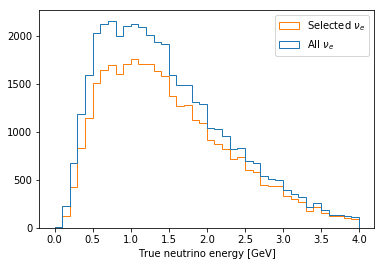

In [18]:
N=40
x_range = (0,4)
data = [all_events_tree.array("nuEnergy"), passed_events_tree.array("mc_nu_energy")]
labs = [r'All $\nu_e$', r'Selected $\nu_e$']

plt.hist(data, bins=N, range=x_range, label=labs, histtype='step')
plt.legend()
plt.xlabel("True neutrino energy [GeV]")

In [19]:
mask = all_events_tree.array('foundATargetSlice')
true_nu_info = all_events_tree.pandas.df(['nuVertexX', 'nuVertexY', 'nuVertexZ'])

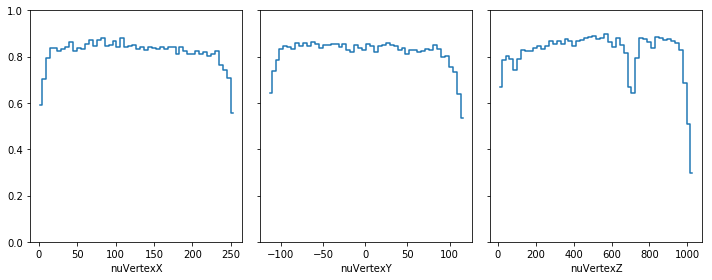

In [20]:
fig,axes= plt.subplots(1,3, figsize=(10,4), sharey=True)

for ax,col in zip(axes, true_nu_info.columns):
    denominator, edges = np.histogram(true_nu_info[col], bins=50)
    nominator, _ = np.histogram(true_nu_info[col][mask], bins=edges)
    centers = (edges[:-1]+edges[1:])/2
    ax.step(centers, nominator/denominator, where='mid')
    ax.set_xlabel(col)
ax.set_ylim(0,1)
fig.tight_layout()

## Fraction of electron neutrinos that have a proton daughter
Every neutrino has multiple mcparticles as daughters, which is represented as vector branches.
uproot handles these using JaggedArrays

In [21]:
passed_events_tree.arrays(['mc_nu_daughter_matched', 'mc_nu_daughter_pdg', 'mc_nu_daughter_energy'])

{b'mc_nu_daughter_energy': <JaggedArray [[0.41574422 0.948312   0.943948   0.93949205 0.9419836  0.94061023
  0.94575137 0.9386347  0.9393971  0.94879264 0.94177    0.94030327
  0.93892115 0.94329107 0.94708395 0.94474643 0.93898875 0.9406226
  0.9444209  0.9449838  0.94662327 0.9430851  0.9392191  0.94349325
  0.9494133  0.94042844] [0.37688267 0.9790583  1.0693839 ] [1.0046513 1.4217837] ... [2.1958606 1.1646888 0.1869529], [0.40065998 1.30921    0.9942619  0.52403694 0.45441443 0.94441265], [1.675684   1.1333263  1.092759   1.0121278  0.96950024 1.2032175
  1.0657611  1.0839514  1.0257275  0.98749197 0.9889131  1.0100199
  1.0078492  1.0821744  0.29153764 1.0333673 ]] at 7fd698140630>,
 b'mc_nu_daughter_matched': <JaggedArray [[ True False False False False False False False False False False False
  False False False False False False False False False False False False
  False False] [ True False False] [ True  True] ... [ True False  True], [ True  True False False False False], 

We can use pandas using multi index:

In [22]:
mc_daughters = ['mc_nu_daughter_matched', 'mc_nu_daughter_pdg', 'mc_nu_daughter_energy']
data = [passed_events_tree.array(key).pandas() for key in mc_daughters]
mc_daughters_df = pd.concat(data,axis=1)
mc_daughters_df.columns = mc_daughters
mc_daughters_df.query('mc_nu_daughter_matched').head(10)

mc_nu_daughter_matched  mc_nu_daughter_pdg  mc_nu_daughter_energy
0 0                    True                 -11               0.415744
1 0                    True                 -11               0.376883
2 0                    True                  11               1.004651
  1                    True                2212               1.421784
3 0                    True                  11               0.996881
  2                    True                2212               0.992004
4 0                    True                  11               0.935776
5 0                    True                  11               0.527215
  1                    True                 211               0.750110
6 0                    True                 -11               1.357358

Or just numpy

In [23]:
proton_mask = (passed_events_tree.array('mc_nu_daughter_pdg')==2212) & (passed_events_tree.array('mc_nu_daughter_energy')> (938+40)/1000)
reconstructed_mask = passed_events_tree.array('mc_nu_daughter_matched')
has_reconstructed_proton = (proton_mask & reconstructed_mask)

One proton is enough!

In [24]:
reco_proton_mask = has_reconstructed_proton.any()
true_proton_mask = proton_mask.any()

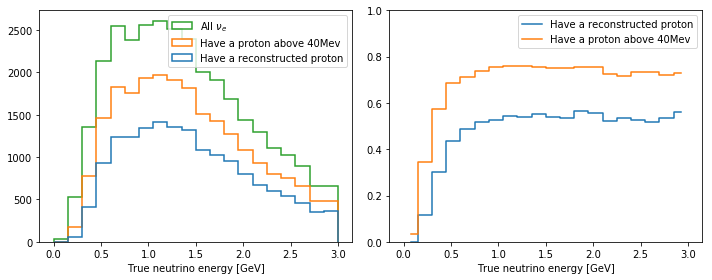

In [25]:
fig,ax= plt.subplots(1,2, figsize=(10,4), sharex=True)

mc_energy = passed_events_tree.array("mc_nu_energy")
data = [mc_energy[reco_proton_mask], mc_energy[true_proton_mask], mc_energy]
labs= [r'Have a reconstructed proton', r'Have a proton above 40Mev', r'All $\nu_e$']
bins, edges, _ = ax[0].hist(data, bins=20, range=(0,3), label=labs, histtype='step', lw=1.5)
ax[0].set_xlabel("True neutrino energy [GeV]")
ax[0].legend()

ratios = bins[:-1]/bins[-1]
centers = (edges[:-1]+edges[1:])/2
ax[1].step(centers, ratios[0], where='mid',label=labs[0])
ax[1].step(centers, ratios[1], where='mid',label=labs[1])
ax[1].set_xlabel("True neutrino energy [GeV]")
ax[1].set_ylim(0,1)
ax[1].legend()

fig.tight_layout()

## Slices

In [26]:
slices_tree.keys()

[b'sliceId',
 b'run',
 b'subRun',
 b'event',
 b'hasDeposition',
 b'totalCharge',
 b'centerX',
 b'centerY',
 b'centerZ',
 b'minX',
 b'deltaY',
 b'deltaZ',
 b'deltaYSigma',
 b'deltaZSigma',
 b'chargeToLightRatio',
 b'xclVariable',
 b'passesPreCuts',
 b'flashMatchScore',
 b'flashMatchX',
 b'totalPEHypothesis',
 b'peHypothesisSpectrum',
 b'isTaggedAsTarget',
 b'targetMethod',
 b'isConsideredByFlashId',
 b'topologicalScore',
 b'hasBestTopologicalScore',
 b'hasBestFlashMatchScore',
 b'nHits',
 b'purity',
 b'completeness',
 b'isMostComplete',
 b'nuInteractionType',
 b'nuCCNC',
 b'nuEnergy',
 b'leptonEnergy',
 b'nuInteractionTime',
 b'nuPdgCode',
 b'nuVertexX',
 b'nuVertexY',
 b'nuVertexZ']

In [36]:
cols = ['purity','completeness', 'isConsideredByFlashId', 'hasDeposition', 'deltaZ', 'deltaY', 'chargeToLightRatio', 'topologicalScore','totalCharge', 'nHits']

slices_df = slices_tree.pandas.df(cols)
slices_df['good'] = slices_df.eval('purity>0.8 & completeness>0.8')
good_slices_df = slices_df.query('hasDeposition & isConsideredByFlashId')
print(len(good_slices_df))

178053


/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


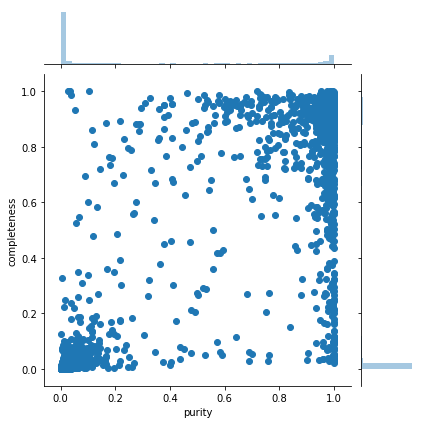

In [37]:
sns.jointplot('purity','completeness', good_slices_df.head(5000))

/home/wouter/Binaries/miniconda3/envs/uprootenv/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0, 500)

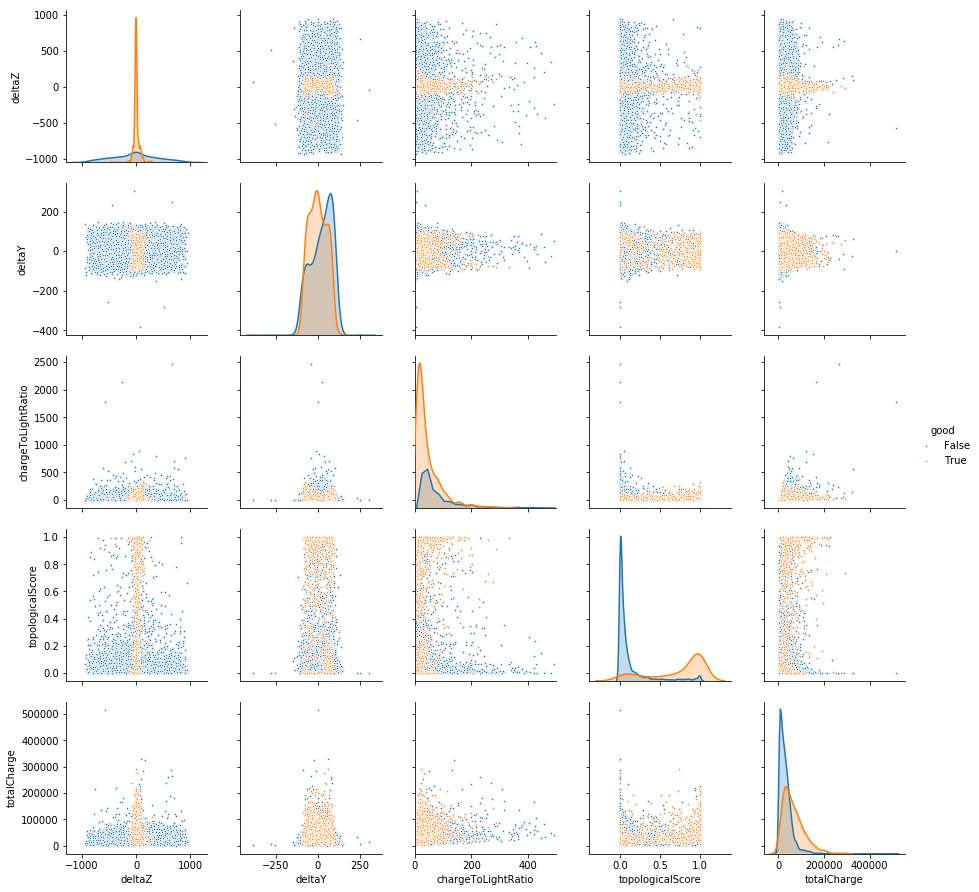

In [38]:
variables = ['deltaZ', 'deltaY', 'chargeToLightRatio', 'topologicalScore','totalCharge'] 
lm = sns.pairplot(good_slices_df.head(5000), hue='good', vars=variables, plot_kws={'s':6, 'alpha':1})
lm.axes[2,2].set_xlim(0,500)

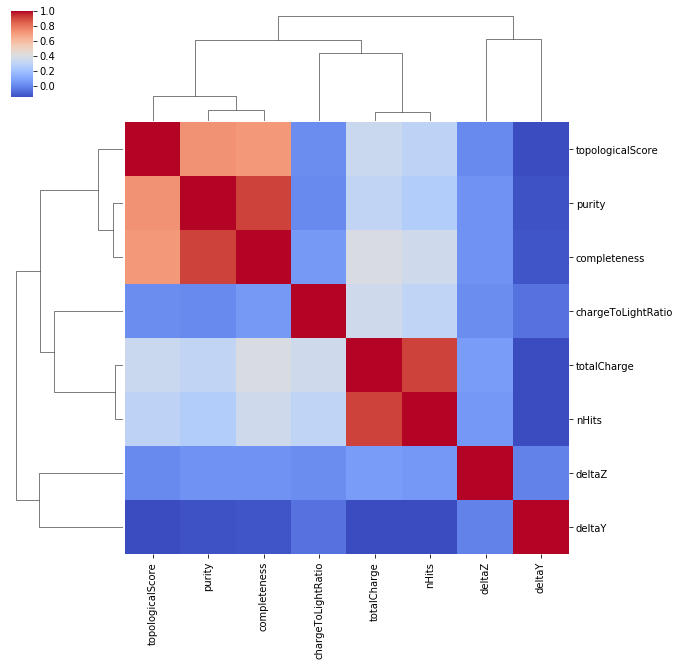

In [41]:
variables = ['purity','completeness', 'deltaZ', 'deltaY', 'chargeToLightRatio', 'topologicalScore','totalCharge', 'nHits']
sns.clustermap(good_slices_df[variables].head(5000).corr(), cmap='coolwarm')

## Done!